In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


In [3]:
# DONE download and train
# download=False & train=False
# train (bool, optional) – If True, creates dataset from training set, otherwise creates from test set.
# 
# https://pytorch.org/vision/0.8/datasets.html
train_dataset  = torchvision.datasets.FashionMNIST("./data/", 
                                                   download=False, 
                                                   transform=transforms.Compose([transforms.ToTensor()]))
test_dataset  = torchvision.datasets.FashionMNIST("./data/", 
                                                  download=False, 
                                                  train=False, 
                                                  transform=transforms.Compose([transforms.ToTensor()])) 

# train_dataset  = torchvision.datasets.FashionMNIST("./chap05/data/", 
#                                                    download=False, 
#                                                    transform=transforms.Compose([transforms.ToTensor()]))
# test_dataset  = torchvision.datasets.FashionMNIST("./chap05/data/", 
#                                                   download=False, 
#                                                   train=False, 
#                                                   transform=transforms.Compose([transforms.ToTensor()])) 

In [4]:
print("Train dataset")
print(f"type: {type(train_dataset)}")
print(train_dataset)
print()
print("Test dataset")
print(f"type: {type(test_dataset)}")
print(test_dataset)

Train dataset
type: <class 'torchvision.datasets.mnist.FashionMNIST'>
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Test dataset
type: <class 'torchvision.datasets.mnist.FashionMNIST'>
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [5]:
# DONE DataLoader
# - map-style and iterable-style datasets,
# - customizing data loading order,
# - automatic batching,
# - single- and multi-process data loading,
# - automatic memory pinning.
# 
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

In [6]:
print(f"type(train_loader): {type(train_loader)}")
print(f"len(train_loader): {len(train_loader)}")
print(dir(train_loader))
print()
print(f"len(test_loader): {len(test_loader)}")

type(train_loader): <class 'torch.utils.data.dataloader.DataLoader'>
len(train_loader): 600
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_is_protocol', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor

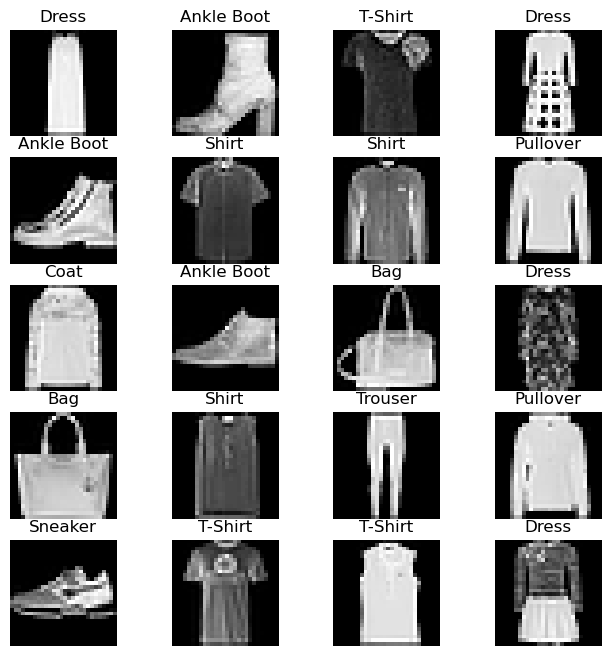

In [7]:
# DONE labels_map - train_dataset
# train_dataset -> (image, target) X N
# train_dataset[img_xy] -> (image, target)
# train_dataset[img_xy][1] -> target
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows +1):
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()